In [1]:
import experiments

# Experiment 1.1
Testing out the effects of changing the number of channels and layers in the single cell spike prediction model. This is not a methodical hyperparameter sweep.

The baseline is commit #fc8e168.

## 1.1.1
Changing the final residual block from 200 -> 100 channels.

Results:
   - training speed was slower than baseline.
   - training loss eventually reached a similar level
   - validation loss stayed higher  
   - the evaluation notebook gave slightly improved correlation results
   

Blue is baseline:
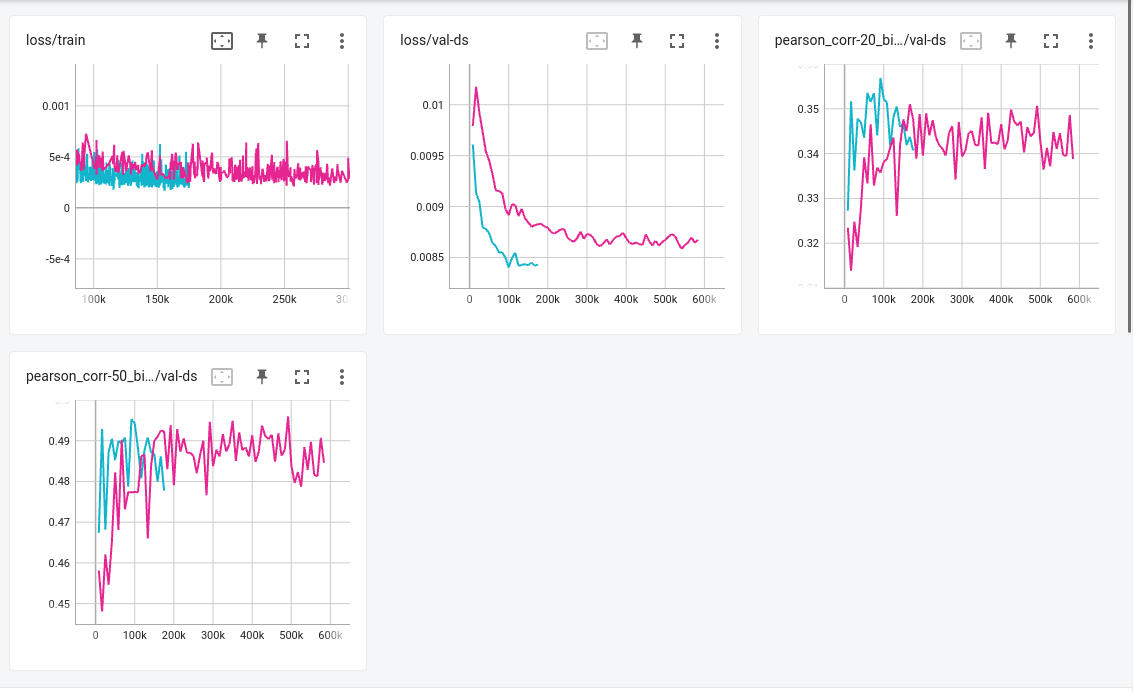


## 1.1.2
With 1.1.1 as baseline, this time layer1 (residual block without stride) is removed. So we are losing 1 out of the 3 residual blocks.

Light blue is the original baseline (same as above), dark blue is the results from 1.1.1, and the pink is 1.1.2.
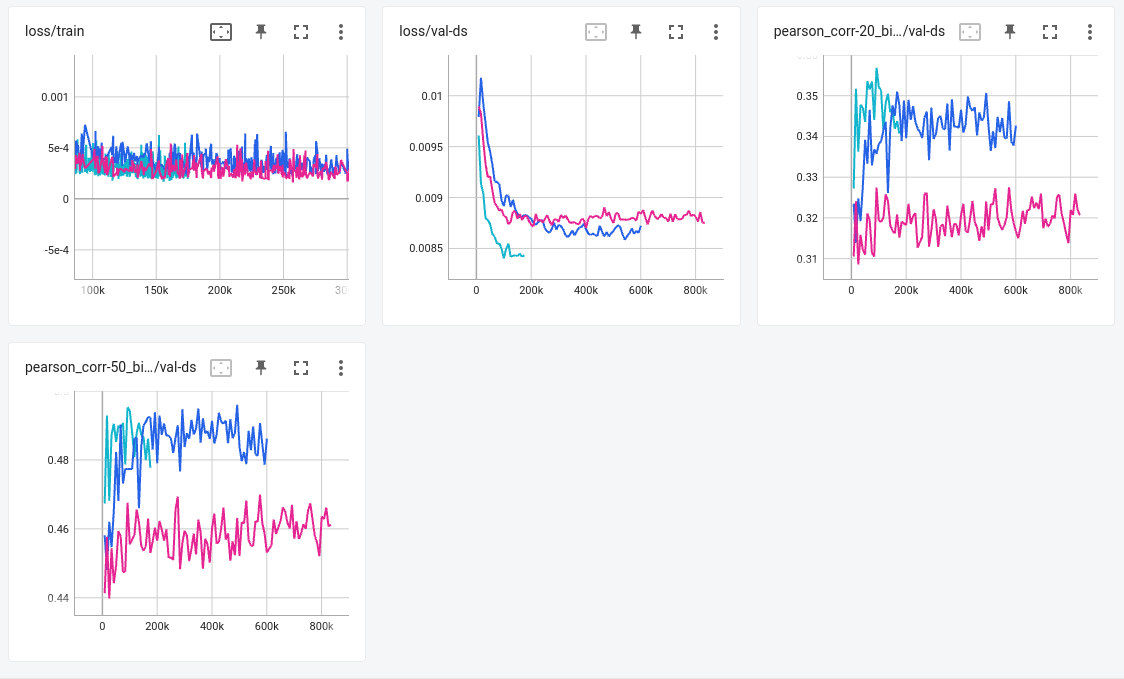
